In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
fb_df = pd.read_csv('../data/epl2020.csv')

In [5]:
fb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 45 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    576 non-null    int64  
 1   h_a           576 non-null    object 
 2   xG            576 non-null    float64
 3   xGA           576 non-null    float64
 4   npxG          576 non-null    float64
 5   npxGA         576 non-null    float64
 6   deep          576 non-null    int64  
 7   deep_allowed  576 non-null    int64  
 8   scored        576 non-null    int64  
 9   missed        576 non-null    int64  
 10  xpts          576 non-null    float64
 11  result        576 non-null    object 
 12  date          576 non-null    object 
 13  wins          576 non-null    int64  
 14  draws         576 non-null    int64  
 15  loses         576 non-null    int64  
 16  pts           576 non-null    int64  
 17  npxGD         576 non-null    float64
 18  teamId        576 non-null    

### check for duplicates

In [6]:
fb_df.duplicated().sum()

0

### Checking for missing values

In [7]:
fb_df.isnull().sum()

Unnamed: 0      0
h_a             0
xG              0
xGA             0
npxG            0
npxGA           0
deep            0
deep_allowed    0
scored          0
missed          0
xpts            0
result          0
date            0
wins            0
draws           0
loses           0
pts             0
npxGD           0
teamId          0
ppda_cal        0
allowed_ppda    0
matchtime       0
tot_points      0
round           0
tot_goal        0
tot_con         0
Referee.x       0
HS.x            0
HST.x           0
HF.x            0
HC.x            0
HY.x            0
HR.x            0
AS.x            0
AST.x           0
AF.x            0
AC.x            0
AY.x            0
AR.x            0
B365H.x         0
B365D.x         0
B365A.x         0
HtrgPerc        0
AtrgPerc        0
matchDay        0
dtype: int64

In [8]:
fb_df.sample(5)

,Unnamed: 0,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,missed,...,AF.x,AC.x,AY.x,AR.x,B365H.x,B365D.x,B365A.x,HtrgPerc,AtrgPerc,matchDay
491,492,a,0.716298,3.719500,0.716298,3.719500,7,8,0,4,...,15,11,2,0,1.25,6.00,12.00,0.562500,0.235294,Sat
169,170,a,0.402873,0.675554,0.402873,0.675554,5,7,0,0,...,11,7,3,0,1.72,4.20,4.20,0.181818,0.100000,Sat
265,266,h,2.731850,1.120340,2.731850,1.120340,6,3,0,1,...,16,3,3,0,1.28,6.00,9.00,0.315789,0.800000,Sat
432,433,a,1.745640,1.105840,1.745640,1.105840,21,4,1,0,...,8,3,2,0,4.50,4.33,1.66,0.285714,0.538462,Sat
35,36,h,1.847780,0.241912,1.847780,0.241912,2,5,1,0,...,11,4,1,0,2.55,3.10,2.90,0.200000,0.666667,Sun


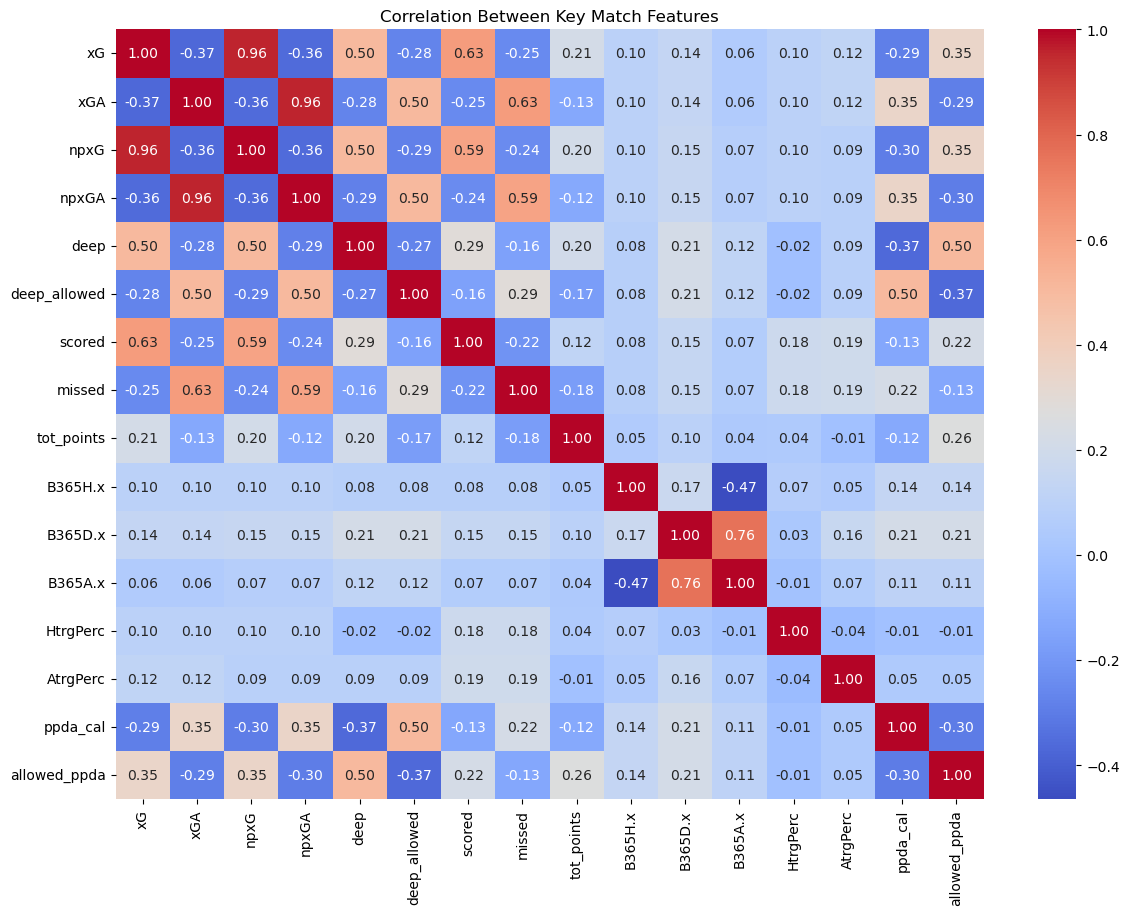

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['xG', 'xGA', 'npxG', 'npxGA', 'deep', 'deep_allowed', 
            'scored', 'missed', 'tot_points', 'B365H.x', 'B365D.x', 
            'B365A.x', 'HtrgPerc', 'AtrgPerc', 'ppda_cal', 'allowed_ppda']

corr_matrix = fb_df[features].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Key Match Features")
plt.show()

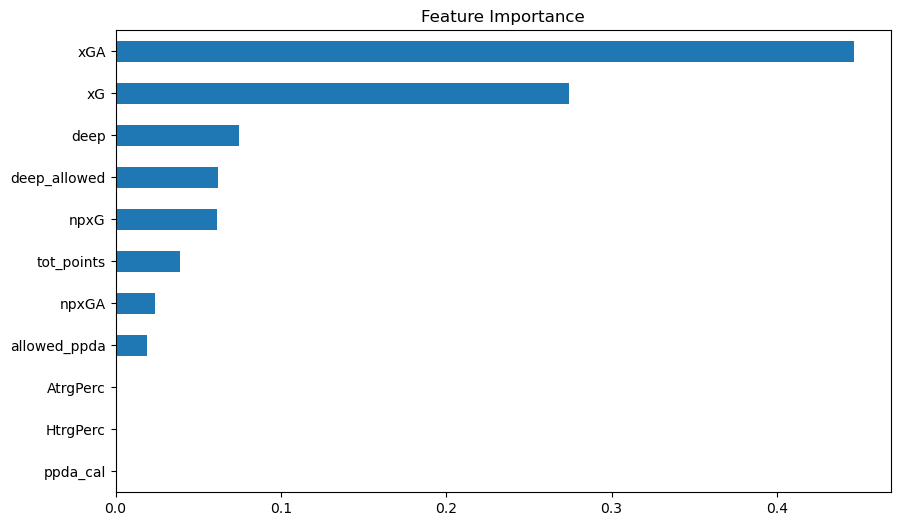

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Encode categorical result (optional for single-label classification)
le = LabelEncoder()
y = le.fit_transform(fb_df["result"])

# Example: pick selected numeric features
X = fb_df[[
    "xG", "xGA", "npxG", "npxGA", "deep", "deep_allowed", 
    "tot_points", "ppda_cal", "allowed_ppda", "HtrgPerc", "AtrgPerc"
]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_train, y_train)

# Show feature importances
importances = pd.Series(clf.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind="barh", figsize=(10, 6), title="Feature Importance")
plt.show()